In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import geodatasets

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('../data/data.csv')

In [3]:
df = df[df['Vessel Name']=='Vessel 2']

In [4]:
df.shape

(105120, 44)

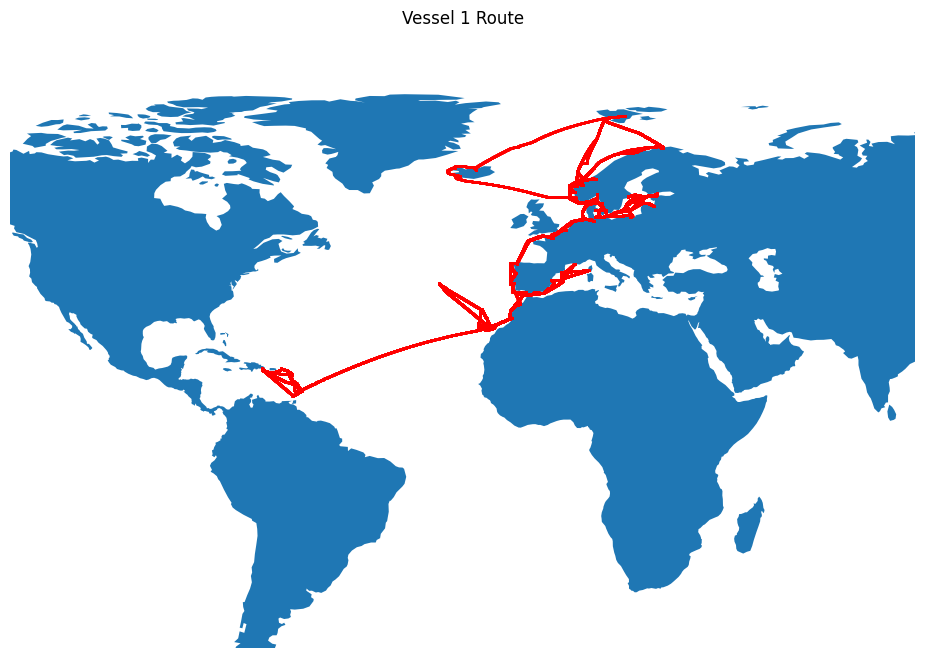

In [5]:
geometry = [Point(xy) for xy in zip(df['Longitude (Degrees)'], df['Latitude (Degrees)'])]
gdf = GeoDataFrame(df, geometry=geometry)

world = gpd.read_file(geodatasets.data.naturalearth.land['url'])
ax = gdf.plot(ax=world.plot(figsize=(16, 8)), marker='o', color='red', markersize=1)
padding = 60
minx, miny, maxx, maxy = gdf.total_bounds
ax.set_xlim(minx-padding, maxx+padding)
ax.set_ylim(miny-padding, maxy+20)
plt.title('Vessel 1 Route')
plt.axis('off')
plt.show()

In [6]:
for col in ['Vessel Name', 'Bow Thruster 1 Power (MW)']:
    print(df[col].unique())

['Vessel 2']
[ 0. nan]


In [7]:
df['Depth (m)'].isna().sum()

np.int64(29738)

In [8]:
df['Depth (m)'].isna().sum()/len(df)

np.float64(0.28289573820395736)

In [9]:
(df['Port Side Propulsion Power (MW)'] + df['Starboard Side Propulsion Power (MW)']).describe()

count    105105.000000
mean          5.820995
std           7.084045
min          -0.020000
25%           0.040000
50%           2.313500
75%          12.615100
max          27.934200
dtype: float64

In [10]:
df['Propulsion Power (MW)'].describe()

count    105105.000000
mean          5.820996
std           7.084044
min          -0.020000
25%           0.040000
50%           2.313500
75%          12.615100
max          27.934500
Name: Propulsion Power (MW), dtype: float64

In [11]:
df.drop(['Vessel Name', 'Bow Thruster 1 Power (MW)', 'Depth (m)', 'Start Time', 'End Time', 'Longitude (Degrees)', 'Latitude (Degrees)', 'Local Time (h)', 'Port Side Propulsion Power (MW)', 'Starboard Side Propulsion Power (MW)'], axis=1, inplace=True)

In [12]:
df.isna().sum().sum()

np.int64(4786)

In [13]:
df.isna().sum()[df.isna().sum()>0]

Power Galley 1 (MW)                     15
Power Galley 2 (MW)                     15
Power Service (MW)                      17
HVAC Chiller 1 Power (MW)              206
HVAC Chiller 2 Power (MW)              206
HVAC Chiller 3 Power (MW)              206
Scrubber Power (MW)                     15
Sea Temperature (Celsius)               15
Boiler 1 Fuel Flow Rate (L/h)           15
Boiler 2 Fuel Flow Rate (L/h)           15
Incinerator 1 Fuel Flow Rate (L/h)      15
Diesel Generator 1 Power (MW)           15
Diesel Generator 2 Power (MW)           15
Diesel Generator 3 Power (MW)           15
Diesel Generator 4 Power (MW)           15
Relative Wind Angle (Degrees)           14
True Wind Angle (Degrees)               32
Relative Wind Direction (Degrees)       14
True Wind Direction (Degrees)           32
Draft (m)                              972
Speed Over Ground (knots)              900
True Wind Speed (knots)                 32
Relative Wind Speed (knots)             14
Speed Throu

In [17]:
df.fillna(method='bfill', inplace=True)

C:\Users\sanat\AppData\Local\Temp\ipykernel_26176\3314729575.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


In [18]:
df.isna().any().any()

np.False_

In [19]:
df.head()

,Power Galley 1 (MW),Power Galley 2 (MW),Power Service (MW),HVAC Chiller 1 Power (MW),HVAC Chiller 2 Power (MW),HVAC Chiller 3 Power (MW),Scrubber Power (MW),Sea Temperature (Celsius),Boiler 1 Fuel Flow Rate (L/h),Boiler 2 Fuel Flow Rate (L/h),Incinerator 1 Fuel Flow Rate (L/h),Diesel Generator 1 Power (MW),Diesel Generator 2 Power (MW),Diesel Generator 3 Power (MW),Diesel Generator 4 Power (MW),Relative Wind Angle (Degrees),True Wind Angle (Degrees),Relative Wind Direction (Degrees),True Wind Direction (Degrees),Draft (m),Speed Over Ground (knots),True Wind Speed (knots),Relative Wind Speed (knots),Speed Through Water (knots),Trim (m),Propulsion Power (MW),Bow Thruster 2 Power (MW),Bow Thruster 3 Power (MW),Stern Thruster 1 Power (MW),Stern Thruster 2 Power (MW),Main Engine 1 Fuel Flow Rate (kg/h),Main Engine 2 Fuel Flow Rate (kg/h),Main Engine 3 Fuel Flow Rate (kg/h),Main Engine 4 Fuel Flow Rate (kg/h)
105120,0.0011,0.0123,5.3725,0.0,0.0,0.6036,0.3153,21.7922,142.210,0.0,8347.52998,3.2544,0.0,0.0,2.1955,186.9740,186.6330,238.7840,238.4430,7.7254,0.1043,1.6455,1.7180,-0.1337,-0.0986,0.0758,0.0,0.0,0.0,0.4410,781.29299,15.612,0.0,586.06800
105121,0.0000,0.0377,5.9642,0.0,0.0,0.5721,0.3189,21.7963,36.788,0.0,8478.92998,3.7641,0.0,0.0,2.5046,182.3368,169.7958,144.2078,120.4239,7.7265,0.7481,2.5954,2.7286,-0.3794,-0.0871,0.3034,0.0,0.0,0.0,0.7544,913.38901,0.000,0.0,694.14100
105122,0.0000,0.0707,6.1702,0.0,0.0,0.5474,0.3191,21.8000,0.000,0.0,8378.98994,3.9401,0.0,0.0,2.6385,120.4257,109.3830,213.7050,202.6660,7.7255,0.9000,1.4179,1.8886,-0.3000,-0.1007,0.4052,0.0,0.0,0.0,0.4107,968.40099,0.000,0.0,672.10699
105123,0.0053,0.0533,5.6465,0.0,0.0,0.5257,0.3170,21.8000,0.000,0.0,8457.04995,3.4039,0.0,0.0,2.2864,297.9700,293.0130,165.8200,160.8660,7.7255,0.6335,3.9384,3.4100,0.0400,-0.0997,0.0433,0.0,0.0,0.0,0.4487,815.55500,0.000,0.0,616.71000
105124,0.0000,0.0443,6.7126,0.0,0.0,0.5152,0.3219,21.8000,0.000,0.0,8446.36992,4.7748,0.0,0.0,3.1987,237.5410,247.4570,181.9030,191.8250,7.7268,1.2100,2.8891,1.9422,0.1857,-0.0878,1.2607,0.0,0.0,0.0,1.0507,1125.06699,0.000,0.0,803.75699


In [20]:
df[['Speed Through Water (knots)', 'Speed Over Ground (knots)']].corr()

,Speed Through Water (knots),Speed Over Ground (knots)
Speed Through Water (knots),1.000000,0.997462
Speed Over Ground (knots),0.997462,1.000000


In [21]:
df[['Relative Wind Angle (Degrees)', 'True Wind Angle (Degrees)']].corr()

,Relative Wind Angle (Degrees),True Wind Angle (Degrees)
Relative Wind Angle (Degrees),1.000000,0.949468
True Wind Angle (Degrees),0.949468,1.000000


In [22]:
df[['Relative Wind Speed (knots)', 'True Wind Speed (knots)']].corr()

,Relative Wind Speed (knots),True Wind Speed (knots)
Relative Wind Speed (knots),1.000000,0.766632
True Wind Speed (knots),0.766632,1.000000


In [23]:
df[['Relative Wind Direction (Degrees)', 'True Wind Direction (Degrees)']].corr()

,Relative Wind Direction (Degrees),True Wind Direction (Degrees)
Relative Wind Direction (Degrees),1.000000,0.682332
True Wind Direction (Degrees),0.682332,1.000000


In [24]:
df_new = pd.DataFrame()

df_new['Power Galley (MW)'] = df['Power Galley 1 (MW)'] + df['Power Galley 2 (MW)']
df_new['Power Service (MW)'] = df['Power Service (MW)']
df_new['HVAC Chiller Power (MW)'] = df['HVAC Chiller 1 Power (MW)'] + df['HVAC Chiller 2 Power (MW)'] + df['HVAC Chiller 3 Power (MW)']
df_new['Scrubber Power (MW)'] = df['Scrubber Power (MW)']
df_new['Sea Temperature (Celsius)'] = df['Sea Temperature (Celsius)']
df_new['Boiler Fuel Flow Rate (L/h)'] = df['Boiler 1 Fuel Flow Rate (L/h)'] + df['Boiler 2 Fuel Flow Rate (L/h)']
df_new['Incinerator 1 Fuel Flow Rate (L/h)'] = df['Incinerator 1 Fuel Flow Rate (L/h)']
df_new['Diesel Generator Power (MW)'] = df['Diesel Generator 1 Power (MW)'] + df['Diesel Generator 2 Power (MW)'] + df['Diesel Generator 3 Power (MW)'] + df['Diesel Generator 4 Power (MW)']
df_new['Relative Wind Angle (Degrees)'] = df['Relative Wind Angle (Degrees)']
df_new['Relative Wind Direction (Degrees)'] = df['Relative Wind Direction (Degrees)']
df_new['Draft (m)'] = df['Draft (m)']
df_new['Relative Wind Speed (knots)'] = df['Relative Wind Speed (knots)']
df_new['Speed Through Water (knots)'] = df['Speed Through Water (knots)']
df_new['Trim (m)'] = df['Trim (m)']
df_new['Propulsion Power (MW)'] = df['Propulsion Power (MW)']
df_new['Bow Thruster Power (MW)'] = df['Bow Thruster 2 Power (MW)'] + df['Bow Thruster 3 Power (MW)']
df_new['Stern Thruster Power (MW)'] = df['Stern Thruster 1 Power (MW)'] + df['Stern Thruster 2 Power (MW)']
df_new['Main Engine Fuel Flow Rate (kg/h)'] = df['Main Engine 1 Fuel Flow Rate (kg/h)'] + df['Main Engine 2 Fuel Flow Rate (kg/h)']

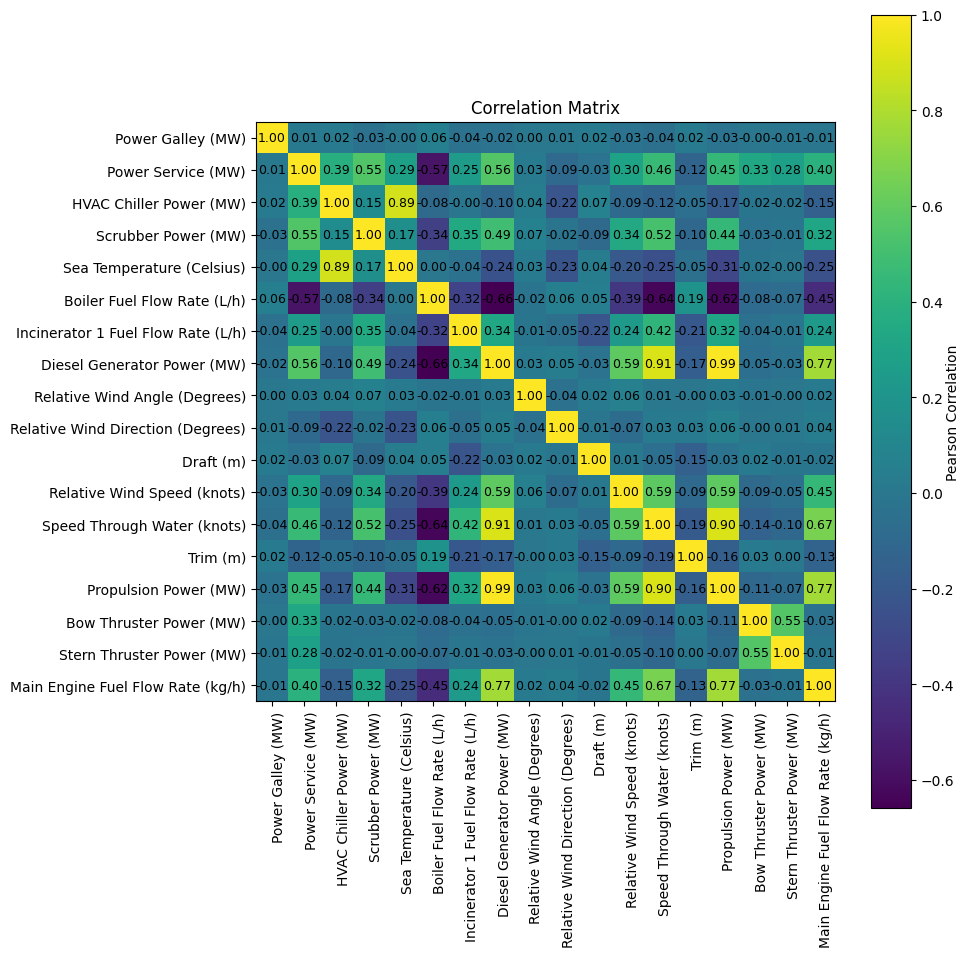

In [25]:
corr = df_new.corr()
corr_col = df_new.columns
col_size = len(df_new.columns)

fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(corr)

cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Pearson Correlation", rotation=90, va="bottom")

ax.set_xticks(np.arange(col_size), labels=corr_col)
ax.set_yticks(np.arange(col_size), labels=corr_col)

plt.setp(ax.get_xticklabels(), rotation=90, ha="right", rotation_mode="anchor")

for i, ix in enumerate(corr_col):
    for j, jx in enumerate(corr_col):
        text = ax.text(j, i, '{0:.2f}'.format(corr.loc[ix, jx]), ha="center", va="center", color="black", fontsize=9)

ax.set_title("Correlation Matrix")
fig.tight_layout()
plt.show()

In [26]:
corr_list = corr.unstack()
corr_list = corr_list[corr_list!=1]
corr_list.sort_values(ascending=False, inplace=True)
corr_list = corr_list.iloc[[i for i in range(0, len(corr_list), 2)]]

In [31]:
print(corr_list[:10])

Propulsion Power (MW)              Diesel Generator Power (MW)          0.991696
Diesel Generator Power (MW)        Speed Through Water (knots)          0.905689
Speed Through Water (knots)        Propulsion Power (MW)                0.904470
Sea Temperature (Celsius)          HVAC Chiller Power (MW)              0.885724
Diesel Generator Power (MW)        Main Engine Fuel Flow Rate (kg/h)    0.772227
Propulsion Power (MW)              Main Engine Fuel Flow Rate (kg/h)    0.770449
Main Engine Fuel Flow Rate (kg/h)  Speed Through Water (knots)          0.669353
Diesel Generator Power (MW)        Relative Wind Speed (knots)          0.590925
Propulsion Power (MW)              Relative Wind Speed (knots)          0.590339
Relative Wind Speed (knots)        Speed Through Water (knots)          0.585033
dtype: float64


In [28]:
print(corr_list[-10:])

Sea Temperature (Celsius)          Speed Through Water (knots)          -0.254284
                                   Propulsion Power (MW)                -0.305812
Boiler Fuel Flow Rate (L/h)        Incinerator 1 Fuel Flow Rate (L/h)   -0.322390
Scrubber Power (MW)                Boiler Fuel Flow Rate (L/h)          -0.344100
Boiler Fuel Flow Rate (L/h)        Relative Wind Speed (knots)          -0.388746
Main Engine Fuel Flow Rate (kg/h)  Boiler Fuel Flow Rate (L/h)          -0.451504
Power Service (MW)                 Boiler Fuel Flow Rate (L/h)          -0.573270
Boiler Fuel Flow Rate (L/h)        Propulsion Power (MW)                -0.621797
Speed Through Water (knots)        Boiler Fuel Flow Rate (L/h)          -0.638355
Diesel Generator Power (MW)        Boiler Fuel Flow Rate (L/h)          -0.659181
dtype: float64


In [38]:
corr.loc['Diesel Generator Power (MW)', 'Scrubber Power (MW)']

np.float64(0.4906849868321783)

In [39]:
corr.loc['Speed Through Water (knots)', 'Trim (m)']

np.float64(-0.19174884019222066)